In [1]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Store the data set
df = pd.read_csv('/content/diabetes (1).csv')
#Look at first 7 rows of data
df.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [4]:
#Show the shape (number of rows & columns)
df.shape

(768, 9)

In [5]:
#Checking for duplicates and removing them
df.drop_duplicates(inplace = True)

In [6]:
#Show the shape to see if any rows were dropped 
df.shape

(768, 9)

In [7]:
#Show the number of missing (NAN, NaN, na) data for each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#Convert the data into an array
dataset = df.values
dataset

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [9]:
# Get all of the rows from the first eight columns of the dataset
X = dataset[:,0:8] 
# Get all of the rows from the last column
y = dataset[:,8] 

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.2, random_state = 4)

In [12]:
model = Sequential([
    Dense(12, activation='relu', input_shape=( 8 ,)),
    Dense(15, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [13]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [14]:
hist = model.fit(X_train, y_train,
          batch_size=57, epochs=1000, validation_split=0.2)

Epoch 1/1000
9/9 [==============================] - 2s 97ms/step - loss: 0.7127 - accuracy: 0.3442 - val_loss: 0.7055 - val_accuracy: 0.3415
Epoch 2/1000
9/9 [==============================] - 0s 31ms/step - loss: 0.7043 - accuracy: 0.3646 - val_loss: 0.6980 - val_accuracy: 0.4146
Epoch 3/1000
9/9 [==============================] - 0s 29ms/step - loss: 0.6972 - accuracy: 0.4297 - val_loss: 0.6919 - val_accuracy: 0.5041
Epoch 4/1000
9/9 [==============================] - 0s 23ms/step - loss: 0.6914 - accuracy: 0.5560 - val_loss: 0.6863 - val_accuracy: 0.5935
Epoch 5/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.6862 - accuracy: 0.6314 - val_loss: 0.6814 - val_accuracy: 0.6341
Epoch 6/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.6816 - accuracy: 0.6436 - val_loss: 0.6774 - val_accuracy: 0.6748
Epoch 7/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.6778 - accuracy: 0.6517 - val_loss: 0.6740 - val_accuracy: 0.6911
Epoch 8/1000
9

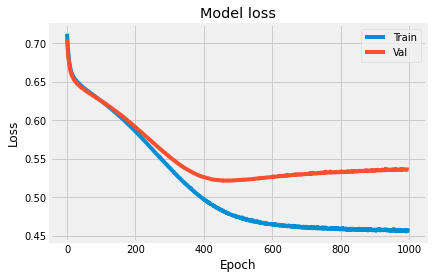

In [15]:
#visualize the training loss and the validation loss to see if the model is overfitting
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

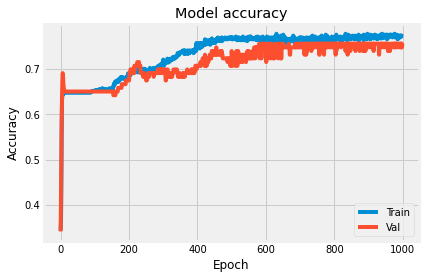

In [17]:
#visualize the training accuracy and the validation accuracy to see if the model is overfitting
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [18]:
#Make a prediction & print the actual values
prediction = model.predict(X_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
print(prediction)
print(y_test)

[0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1]
[0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1.]


In [19]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(X_train)
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_train ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_train,pred))
print()
print('Accuracy: ', accuracy_score(y_train,pred))
print()

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       398
         1.0       0.71      0.58      0.64       216

    accuracy                           0.77       614
   macro avg       0.75      0.73      0.73       614
weighted avg       0.76      0.77      0.76       614

Confusion Matrix: 
 [[346  52]
 [ 90 126]]

Accuracy:  0.7687296416938111



In [20]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(X_test)
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(y_test ,pred ))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print()
print('Accuracy: ', accuracy_score(y_test,pred))
print()

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       102
         1.0       0.71      0.67      0.69        52

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154

Confusion Matrix: 
 [[88 14]
 [17 35]]

Accuracy:  0.7987012987012987



In [21]:
model.evaluate(X_test, y_test)[1]

5/5 [==============================] - 0s 4ms/step - loss: 0.4581 - accuracy: 0.7987


0.798701286315918